# Time Series Analysis II

*N. Hernitschek, 2022*

This is the nineth Jupyter notebook for **ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)**. 
This Jupyter notebook gives a more detailed introduction to time series analysis for astronomical data.

It is based on code from the textbook

Statistics, Data Mining and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of
Survey Data - Z. Ivezic, A. J. Connolly, J. T. VanderPlas, A. Gray

***Exercises required for class participation are in <font color='red'>red</font>.***


---
## Contents
* [Autoregressive Models](#first-bullet)
* [Correlation Functions](#second-bullet)

## 1. Autoregressive Models <a class="anchor" id="first-bullet"></a>

In an $MA$ process a "shock/impulse" affects only the current value and $q$ values into the future.  In an $AR$ process a "shock/impulse" affects *all* future values. 

We can also ***combine AR(p) and MA(q) processes into ARMA(p,q)*** to characterize more complicated data. For example an ARMA(2,1) model combines AR(2) and MA(1):

$$y_i = a_1y_{i-1} +  a_2y_{i-2} + \epsilon_i + b_1 \epsilon_{i-1}.$$

Below is some code and a plot that illustrates this. <font color='red'>Try changing the coefficients (in the yAR, yMA, and yARMA equations) and see what happens.  (You may need to change the plot limits depending on your choices.)</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [14]:
from matplotlib.ticker import MultipleLocator

N = 10

def plotAutoRegress(a1,a2,b1,b2,c1,c2,c3):
    epsilon = np.zeros(N+2)
    epsilon[3] = 1

    yAR = np.zeros(N+2)
    yMA = np.zeros(N+2)
    yARMA = np.zeros(N+2)

    for i in np.arange(N)+2:
        # Complete
        yAR[i] = a1*yAR[i-1] + a2*yAR[i-2] + epsilon[i]
        yMA[i] = epsilon[i] + b1*epsilon[i-1] + b2*epsilon[i-2]
        yARMA[i] = c1*yARMA[i-2] + c2*yARMA[i-1] + epsilon[i] + c3*epsilon[i-1] 

    ###
    fig = plt.figure(figsize=(6, 4))

    t = np.arange(len(yAR))
    plt.plot(t,yAR,label="AR(2), a1= "+str(a1)+" , a2= "+str(a2))
    plt.plot(t,yMA,label="MA(2), b1= "+str(b1)+" , b2= "+str(b2))
    plt.plot(t,yARMA,label="ARMA(2,1), c1= "+str(c1)+" , c2= "+str(c2)+" , c3= "+str(c3),zorder=0)

    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend(loc="upper right",
               prop={'size':12})
    #plt.ylim([0,1.1])

    plt.show()

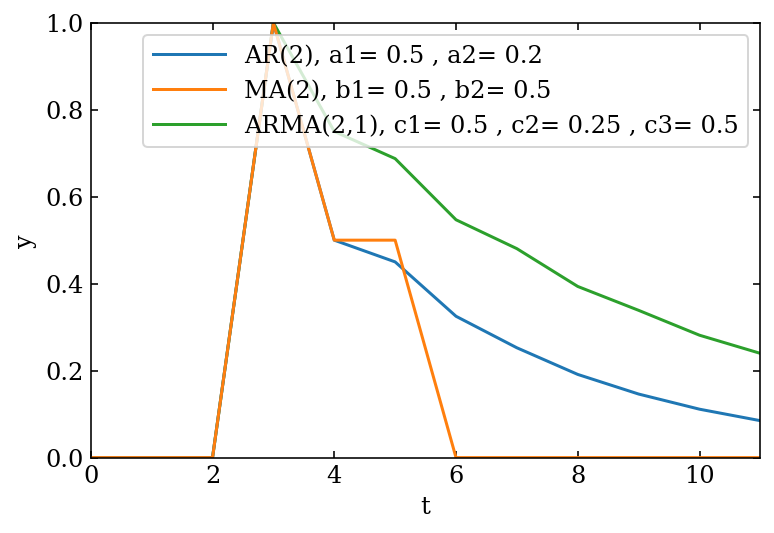

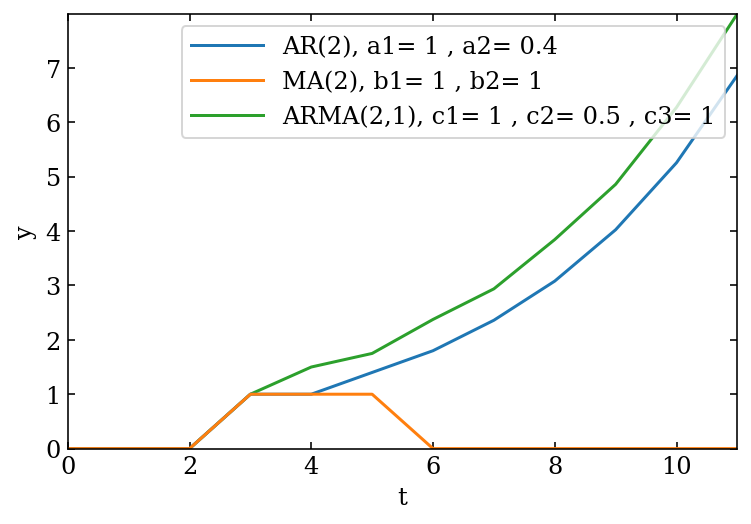

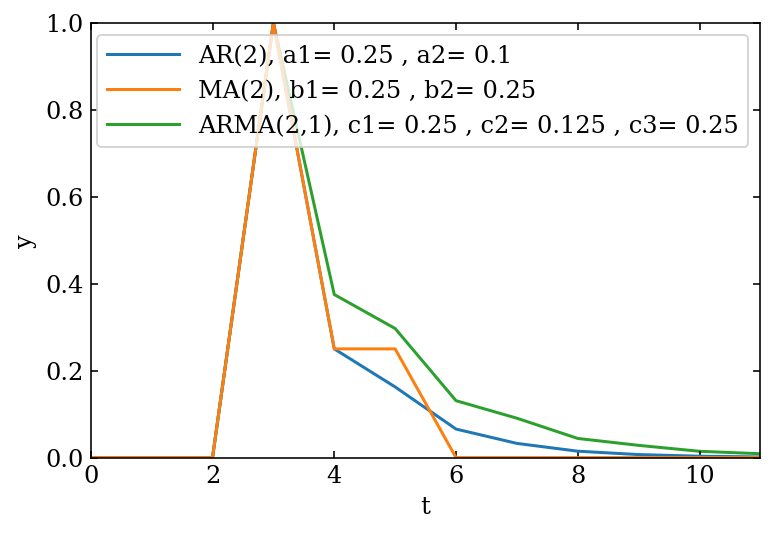

In [16]:
plotAutoRegress(a1=.5,a2=.2,b1=.5,b2=.5,c1=.5,c2=.25,c3=.5)
plotAutoRegress(a1=1,a2=.4,b1=1,b2=1,c1=1,c2=.5,c3=1)
plotAutoRegress(a1=.25,a2=.1,b1=.25,b2=.25,c1=.25,c2=.125,c3=.25)

## 2. Correlation Functions <a class="anchor" id="first-bullet"></a>


astroML has tools for **computing the ACF of *unevenly sampled* data** using two different methods: 
1. [Scargle method](https://ui.adsabs.harvard.edu/abs/1989ApJ...343..874S/abstract)
2. [Edelson & Krolik method](https://ui.adsabs.harvard.edu/abs/1988ESASP.281b.387E/abstract)

[http://www.astroml.org/modules/classes.html#module-astroML.time_series](http://www.astroml.org/modules/classes.html#module-astroML.time_series)

One of the tools is for generating a **damped random walk (DRW)**, which we recall is a process that "remembers" its history only for a characteristic time, $\tau$. The ACF vanishes for $\Delta t \gg \tau$.

*Warning below may require changing to astropy's LS periodogram function.*

In [3]:
# Syntax for EK and Scargle ACF computation
from astroML.time_series import generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

t = np.arange(0,1000)
y = generate_damped_RW(t, tau=300)
dy = 0.1
y = np.random.normal(y,dy)

ACF_scargle, bins_scargle = ACF_scargle(t,y,dy)
ACF_EK, ACF_err_EK, bins_EK = ACF_EK(t,y,dy)

        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


<font color='red'>Figure 10.30 from the textbook gives an example of an ACF for a DRW, which mimics the variability that we might see from a *quasar whose lightcurve is unevenly sampled*.</font>

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]
        Use astropy.stats.LombScargle instead. [astroML.time_series.ACF]


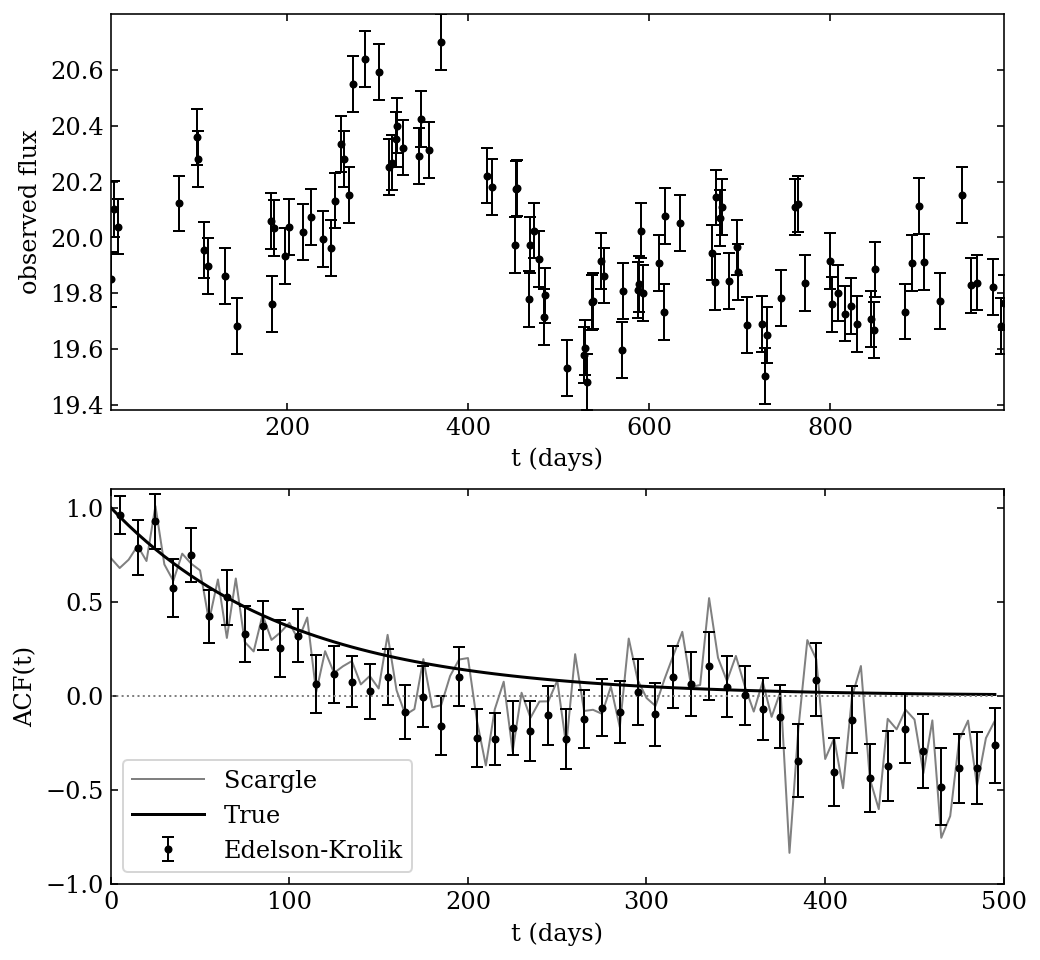

In [4]:
# Ivezic v2, Figure 10.30
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from astroML.time_series import lomb_scargle, generate_damped_RW
from astroML.time_series import ACF_scargle, ACF_EK

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

#------------------------------------------------------------
# Generate time-series data:
#  we'll do 1000 days worth of magnitudes

t = np.arange(0, 1E3)
z = 2.0
tau = 300
tau_obs = tau / (1. + z)

np.random.seed(6)
y = generate_damped_RW(t, tau=tau, 
                       z=z, xmean=20)

# randomly sample 100 of these
ind = np.arange(len(t))
np.random.shuffle(ind)
ind = ind[:100]
ind.sort()
t = t[ind]
y = y[ind]

# add errors
dy = 0.1
y_obs = np.random.normal(y, dy)

#------------------------------------------------------------
# compute ACF via scargle method
C_S, t_S = ACF_scargle(t, y_obs, dy,
                       n_omega=2. ** 12, 
                       omega_max=np.pi / 5.0)

ind = (t_S >= 0) & (t_S <= 500)
t_S = t_S[ind]
C_S = C_S[ind]

#------------------------------------------------------------
# compute ACF via E-K method
C_EK, C_EK_err, bins = ACF_EK(t, y_obs, dy, 
                              bins=np.linspace(0, 500, 51))
t_EK = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 8))

# plot the input data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1)
ax.set_xlabel('t (days)')
ax.set_ylabel('observed flux')

# plot the ACF
ax = fig.add_subplot(212)
ax.plot(t_S, C_S, '-', c='gray', lw=1,
        label='Scargle')
ax.errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1,
            label='Edelson-Krolik')
ax.plot(t_S, np.exp(-abs(t_S) / tau_obs), '-k', label='True')
ax.legend(loc=3)

ax.plot(t_S, 0 * t_S, ':', lw=1, c='gray')

ax.set_xlim(0, 500)
ax.set_ylim(-1.0, 1.1)

ax.set_xlabel('t (days)')
ax.set_ylabel('ACF(t)')

plt.show()

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, all of you should have:
* an good of time series in astronomy
* seen many algorithms that enable you to extract various information from realistic astronomical time series.